<a href="https://colab.research.google.com/github/komal2790/PRODIGY_WD_01/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the Drive helper & Mount
from google.colab import drive

#This will Prompt for Authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Locate the Dataset Folder
!ls "/content/drive/My Drive"

'Colab Notebooks'  'ItsYourNafiz Resume'   Plant_images_pianalytix


In [ ]:
#Importing Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array, array_to_img    #instead of keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical



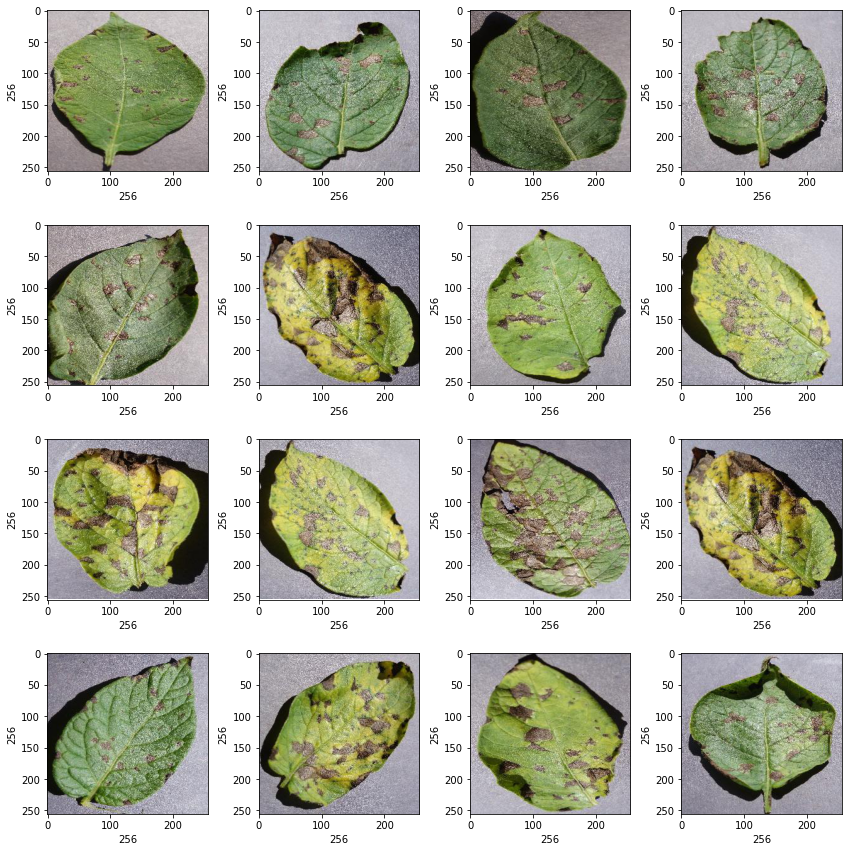

In [ ]:
#Plotting 16 Image to Check Dataset

plt.figure(figsize=(12,12))   #(row, column)
path = "/content/drive/My Drive/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)  #(row, column, plot_count)
  plt.tight_layout()  #Adjust the padding between and around Subplots
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)  #Width of Image
  plt.ylabel(rand_img.shape[0], fontsize =10)  #Height of Image

In [ ]:
#Converting Images to Array

def convertImageToArray(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256,256))
      #image  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None


In [ ]:
dir = "/content/drive/My Drive/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

#Reading and Converting Image to Numpy Array

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convertImageToArray(image_path))
    label_list.append(binary_labels[temp])

In [ ]:
#Visualize The Number of Classes Count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    300
1    300
2    300
dtype: int64

In [ ]:
#Check the Shape of the First Image

image_list[0].shape

(256, 256, 3)

In [ ]:
label_list = np.array(label_list)
label_list.shape

(900,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)   #image_list = x, label_list = y

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256,256,3)

In [ ]:
x_test = np.array(x_test, dtype=np.float16) / 225.0

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3),
                 padding = "same",
                 input_shape = (256,256,3),
                 activation = "relu"))

model.add(MaxPooling2D(pool_size = (3,3)))

model.add(Conv2D(64, (3,3),
                 padding = "same",
                 activation = "relu"))

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(3, activation = "softmax"))   #Provides the Probability of Each Class
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 112896)            0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(0.0001),
              metrics = ['accuracy'])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 46s 8s/step - loss: 1.0345 - accuracy: 0.3385 - val_loss: 0.6673 - val_accuracy: 0.7014
Epoch 2/50
5/5 [==============================] - 37s 7s/step - loss: 0.5527 - accuracy: 0.7830 - val_loss: 0.3500 - val_accuracy: 0.9375
Epoch 3/50
5/5 [==============================] - 41s 7s/step - loss: 0.3127 - accuracy: 0.9635 - val_loss: 0.2511 - val_accuracy: 0.9444
Epoch 4/50
5/5 [==============================] - 40s 8s/step - loss: 0.2151 - accuracy: 0.9514 - val_loss: 0.1600 - val_accuracy: 0.9514
Epoch 5/50
5/5 [==============================] - 38s 7s/step - loss: 0.1527 - accuracy: 0.9583 - val_loss: 0.1250 - val_accuracy: 0.9792
Epoch 6/50
5/5 [==============================] - 37s 7s/step - loss: 0.1184 - accuracy: 0.9757 - val_loss: 0.1056 - val_accuracy: 0.9583
Epoch 7/50
5/5 [==============================] - 37s 7s/step - loss: 0.0915 - accuracy: 0.9809 - val_loss: 0.0944 - val_accuracy: 0.9583
Epoch 8/50
5/5 [==================

In [ ]:
model.save("/content/drive/My Drive/Plant_images_pianalytix/plant_disease.h5")

#Serialize Model to JSON
json_model = model.to_json()

#Save the Model Architecture to JSON File
with open('/content/drive/My Drive/Plant_images_pianalytix/plant_model.json', 'w') as json_file:
  json_file.write(json_model)

#Saving the Weights of the Model
model.save_weights("/content/drive/My Drive/Plant_images_pianalytix/plant_model_weights.h5")

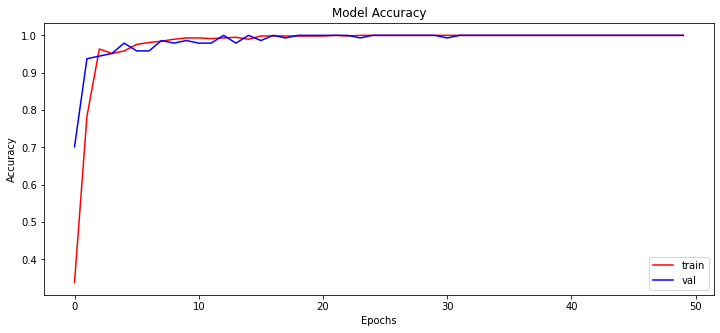

In [ ]:
#Plot the training History

plt.figure(figsize = (12,5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


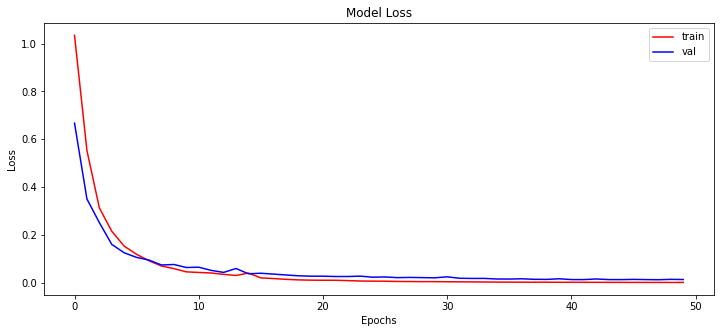

In [ ]:
#Plot the training History

plt.figure(figsize = (12,5))
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
print("[INFO] Calcuating Model Accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calcuating Model Accuracy
6/6 [==============================] - 4s 547ms/step - loss: 0.0268 - accuracy: 0.9889
Test Accuracy: 98.88888597488403


In [ ]:
y_pred = model.predict(x_test)

6/6 [==============================] - 4s 582ms/step


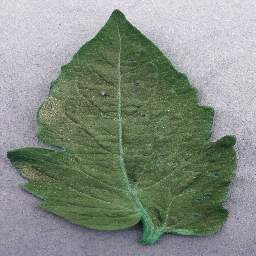

In [ ]:
#Plotting Image to Comapre

img = array_to_img(x_test[10])
img

In [ ]:
#Finding Max Value from Prediction List and Comparing Original Value vs. Predicted

print("Originally :" ,all_labels[np.argmax(y_test[10])])
print("Predicted :" ,all_labels[np.argmax(y_pred[10])])


Originally : Potato-Early_blight
Predicted : Potato-Early_blight
